<a href="https://colab.research.google.com/github/Jheel-patel/Project-Breast-Cancer-detection/blob/master/Project_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)
print(pd.__version__)
print(np.__version__)

0.10.1
1.0.5
1.18.5


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#####Import Dataset

In [2]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data',names=col,header=None)


--2020-08-22 03:54:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.1s    

2020-08-22 03:54:27 (150 KB/s) - ‘breast-cancer-wisconsin.data’ saved [19889/19889]



In [3]:
breast_cancer

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#Data Preporcessing

In [4]:
breast_cancer.isnull().any()

id                             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
np.unique(breast_cancer[['Class']])

array([2, 4])

In [7]:
np.unique(breast_cancer[['Mitoses']])

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10])

In [8]:
breast_cancer['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [9]:
breast_cancer['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
#Removing ?Bare Nuclei values with '?'

tmp = breast_cancer[breast_cancer['Bare Nuclei']=='?']
tmp.index

df = breast_cancer.drop(index=tmp.index)

In [11]:
df

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [12]:
df.reset_index()

,index,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
678,694,776715,3,1,1,1,3,2,1,1,1,2
679,695,841769,2,1,1,1,2,1,1,1,1,2
680,696,888820,5,10,10,3,7,3,8,10,2,4
681,697,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [14]:
df['Class']=df['Class']/2 -1

In [15]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [16]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    object 
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


#####Data Visualization

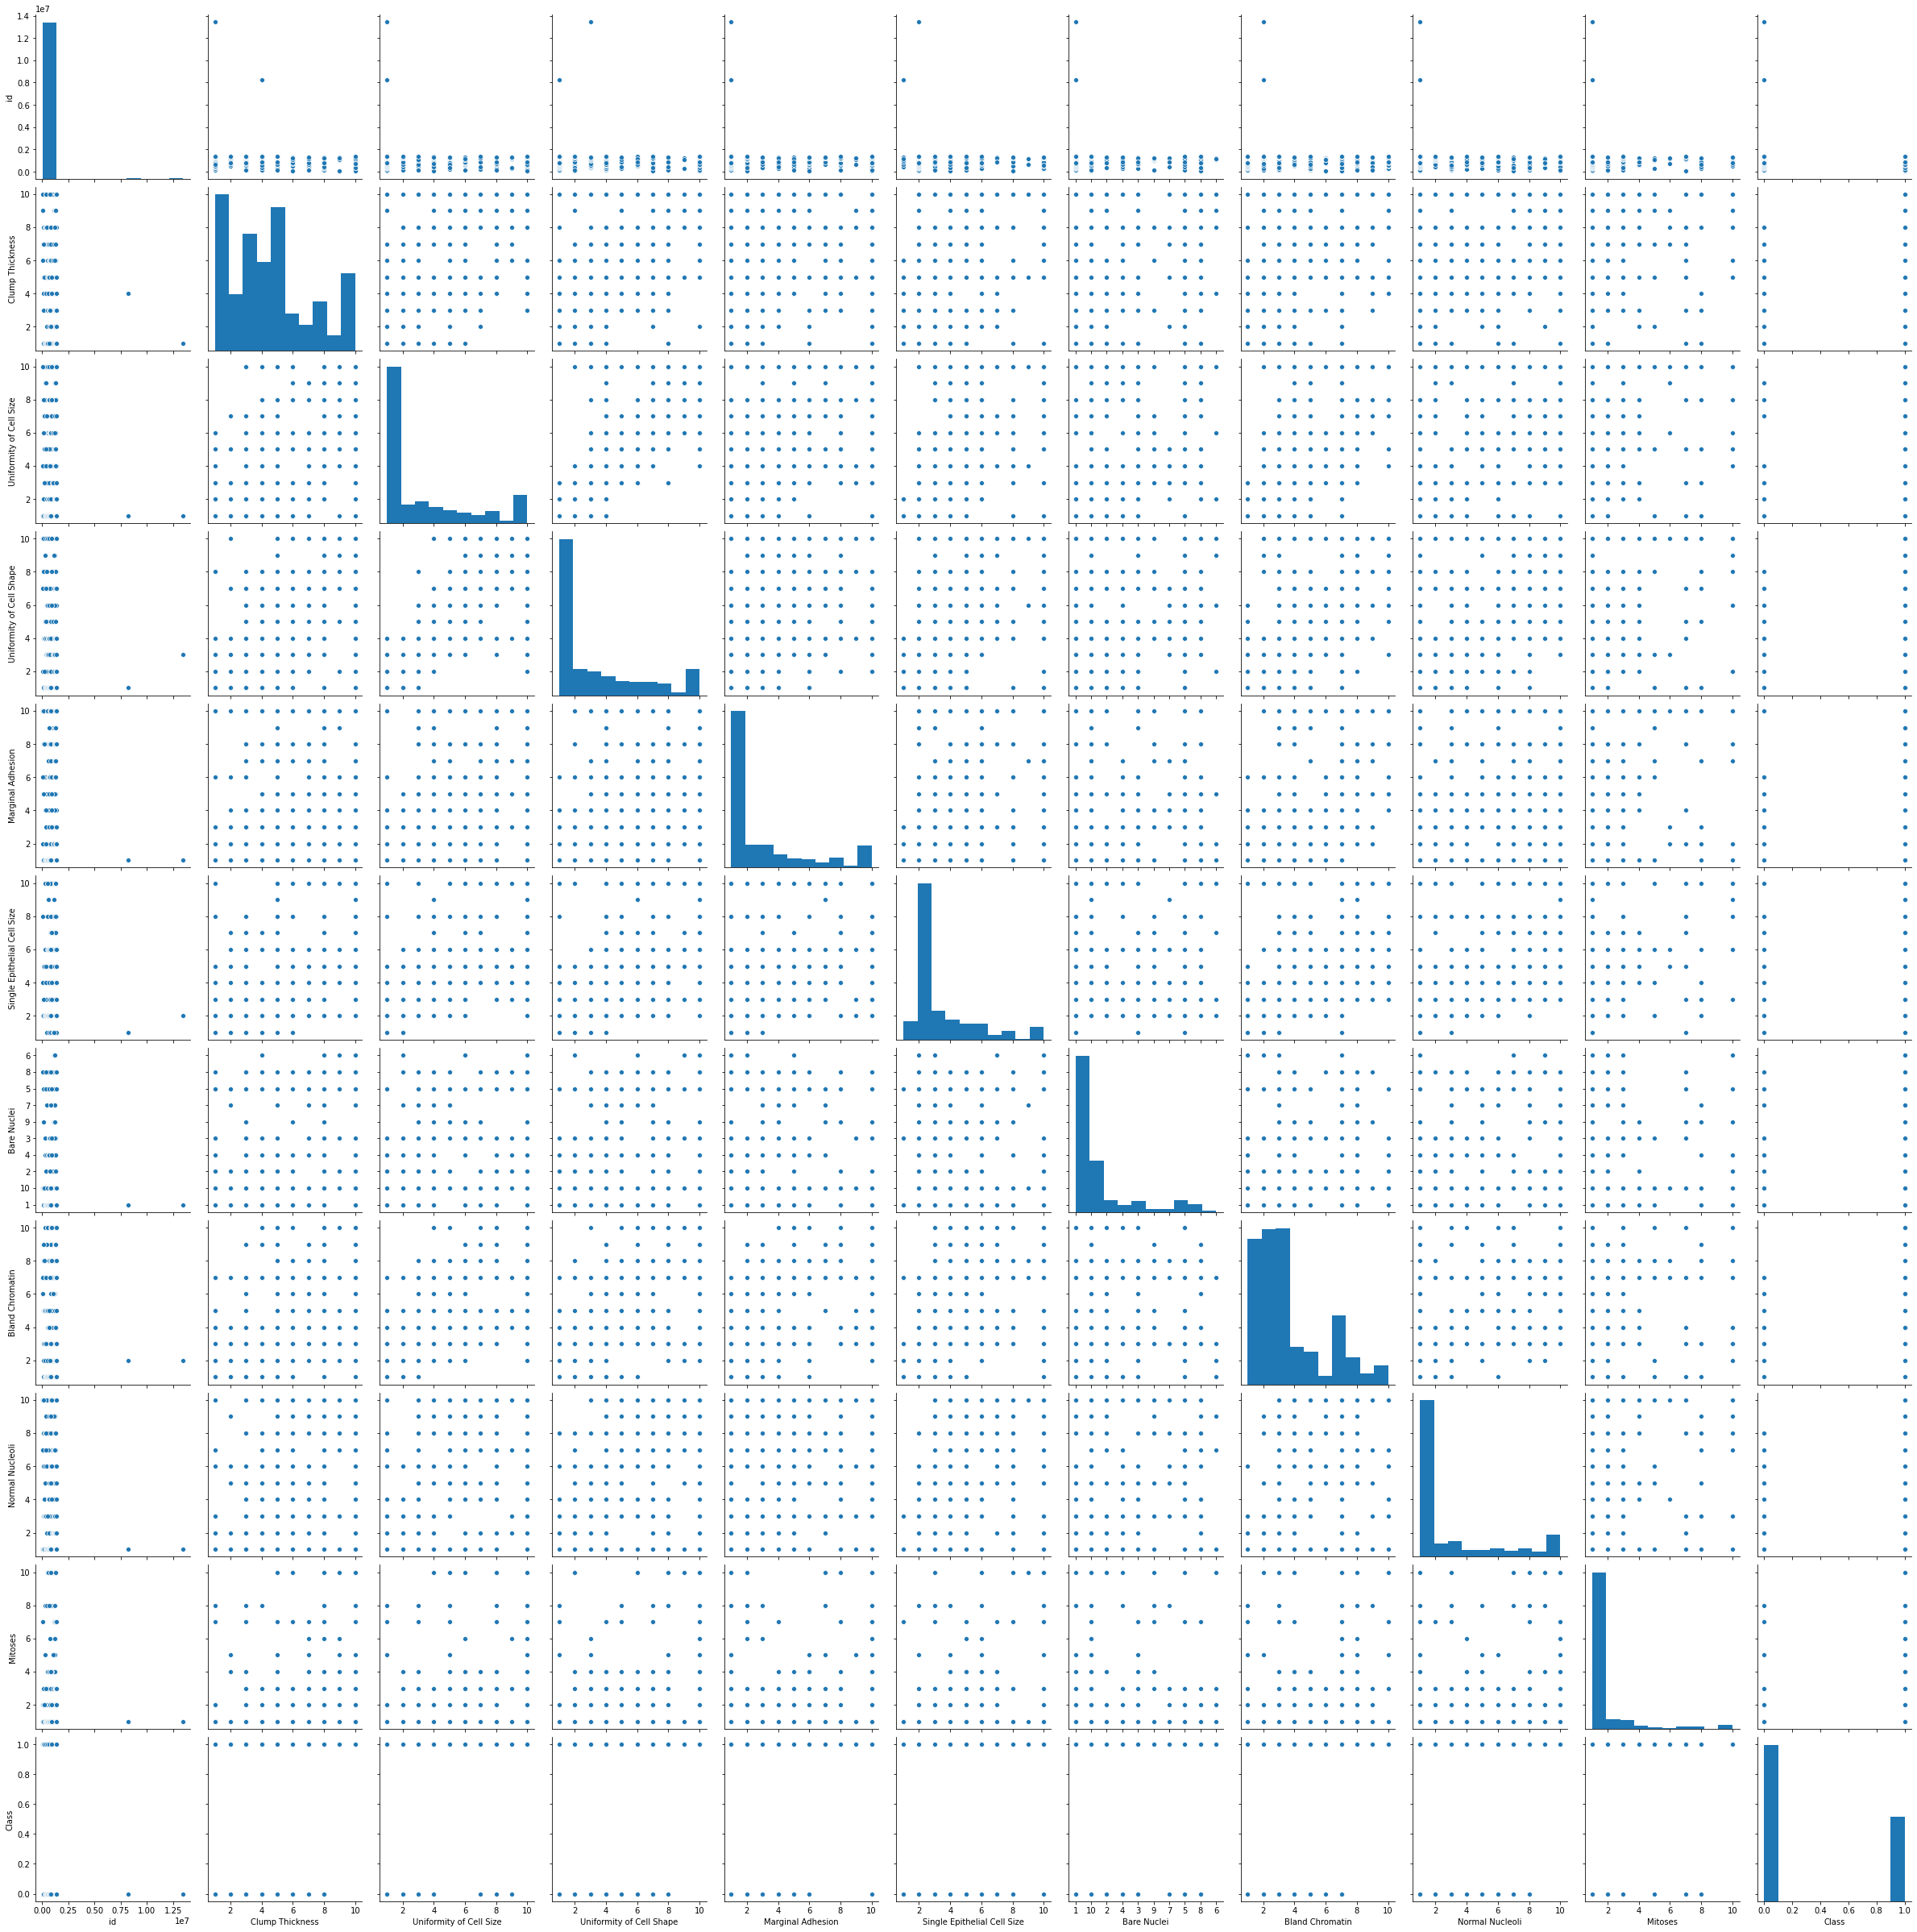

In [18]:
sns.pairplot(df, height=3)
plt.show()

#Split dataset in input and output

In [19]:
X = df.drop(columns=['id','Class'])
X_col=X.columns

In [20]:
y=df['Class']

In [21]:
# Scaling Dataset

from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(X.values)

In [22]:
X=pd.DataFrame(X1,columns=X_col)
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.348400
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.348400
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.348400
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400
...,...,...,...,...,...,...,...,...,...
678,-0.511643,-0.702212,-0.741774,-0.639366,-0.105454,-0.424217,-0.998853,-0.612927,-0.348400
679,-0.866417,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.998853,-0.612927,-0.348400
680,0.197905,2.236180,2.271896,0.059333,1.695166,-0.149582,1.860738,2.337476,0.229166
681,-0.156869,1.583204,0.932487,0.408682,-0.105454,0.125054,2.677764,1.026185,-0.348400


In [23]:
# Split Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.8,random_state=42)

#### Scale Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id','Class'],axis=1).values), columns=X_col).head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


#### Train Knn Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=10,p=2, metric='minkowski')

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        
        

In [29]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print('\n**********************************************\n')
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9632

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        85
         1.0       0.96      0.94      0.95        51

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136


Confusion Matrix: 
 [[83  2]
 [ 3 48]]

ROC AUC: 0.9588

Average Accuracy: 	 0.9560
Accuracy SD: 		 0.0359

**********************************************

Test Result:

accuracy score: 0.9598

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       359
         1.0       0.96      0.92      0.94       188

    accuracy                           0.96       547
   macro avg       0.96      0.95      0.95       547
weighted avg       0.96      0.96      0.96       547


Confusion Matrix: 
 [[352   7]
 [ 15 173]]

ROC AUC: 0.9504



#### Grid Search Using KNN

In [30]:
from sklearn.model_selection import GridSearchCV
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [31]:
params_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19]}

knn_grid = GridSearchCV(knn,params_grid,n_jobs=-1,verbose=1,cv=10,iid=True)

knn_grid.fit(X_train,y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid=True, n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [32]:
knn_grid.best_score_

0.9632352941176471

In [33]:
knn_grid.best_params_

{'n_neighbors': 8}

In [34]:
print_score(knn_grid, X_train, X_test, y_train, y_test, train=True)
print('\n*************************************************\n')
print_score(knn_grid, X_train, X_test, y_train, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Result:

accuracy score: 0.9559

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        85
         1.0       0.94      0.94      0.94        51

    accuracy                           0.96       136
   macro avg       0.95      0.95      0.95       136
weighted avg       0.96      0.96      0.96       136


Confusion Matrix: 
 [[82  3]
 [ 3 48]]

ROC AUC: 0.9529

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Average Accuracy: 	 0.9560
Accuracy SD: 		 0.0359

*************************************************

Test Result:

accuracy score: 0.9726

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       359
         1.0       0.97      0.95      0.96       188

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547


Confusion Matrix: 
 [[354   5]
 [ 10 178]]

ROC AUC: 0.9664



[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [35]:
knn_best = knn_grid.best_estimator_
knn_best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

#### Create an ensemble of SVM, Random Forest , XGBoost

In [36]:
from sklearn import svm
svm_clf = svm.SVC(gamma='scale')
svm_params = {'kernel':['linear','rbf']}
svm_grid = GridSearchCV(svm_clf,svm_params,cv=10,verbose=1,n_jobs=-1,iid=True)
svm_grid.fit(X_train,y_train)
print_score(svm_grid, X_train, X_test, y_train, y_test, train=True)
print('\n**************************************\n')
print_score(svm_grid, X_train, X_test, y_train, y_test, train=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Train Result:

accuracy score: 0.9632

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        85
         1.0       0.96      0.94      0.95        51

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136


Confusion Matrix: 
 [[83  2]
 [ 3 48]]

ROC AUC: 0.9588

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using bac

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Average Accuracy: 	 0.9560
Accuracy SD: 		 0.0359

**************************************

Test Result:

accuracy score: 0.9707

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       359
         1.0       0.95      0.96      0.96       188

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547


Confusion Matrix: 
 [[350   9]
 [  7 181]]

ROC AUC: 0.9688



[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [37]:
svm_best = svm_grid.best_estimator_

In [38]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf_params = {'n_estimators':[50,100,150,200],
             'criterion':['gini','entropy'],
             'bootstrap':[True,False]}
rf_grid = GridSearchCV(rf_clf,rf_params,cv=10,verbose=1,n_jobs=-1)
rf_grid.fit(X_train,y_train)

print_score(rf_grid, X_train, X_test, y_train, y_test, train=True)
print('\n**************************************\n')
print_score(rf_grid, X_train, X_test, y_train, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.7s finished


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00        51

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136


Confusion Matrix: 
 [[85  0]
 [ 0 51]]

ROC AUC: 1.0000

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.6s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.2s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   32.3s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.4s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.8s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.4s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.7s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.2s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   32.5s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.8s finished


Average Accuracy: 	 0.9560
Accuracy SD: 		 0.0359

**************************************

Test Result:

accuracy score: 0.9726

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       359
         1.0       0.94      0.98      0.96       188

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547


Confusion Matrix: 
 [[348  11]
 [  4 184]]

ROC AUC: 0.9740



In [39]:
rf_best = rf_grid.best_estimator_

# Ensemble learners based on knn , rf, and svm

In [40]:
#test the three models with the test data and print their accuracy scores
print('knn: {0:.4f}'.format(knn_best.score(X_test, y_test)))
print('rf: {0:.4f}'.format(rf_best.score(X_test, y_test)))
print('svm: {0:.4f}'.format(svm_best.score(X_test, y_test)))

knn: 0.9726
rf: 0.9726
svm: 0.9707


In [41]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('svm', svm_best)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [42]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.9762340036563071

In [43]:
print_score(ensemble, X_train, X_test, y_train, y_test, train=True)
print('\n**************************************\n')
print_score(ensemble, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9632

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        85
         1.0       0.96      0.94      0.95        51

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136


Confusion Matrix: 
 [[83  2]
 [ 3 48]]

ROC AUC: 0.9588

Average Accuracy: 	 0.9632
Accuracy SD: 		 0.0369

**************************************

Test Result:

accuracy score: 0.9762

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       359
         1.0       0.95      0.98      0.97       188

    accuracy                           0.98       547
   macro avg       0.97      0.98      0.97       547
weighted avg       0.98      0.98      0.98       547


Confusion Matrix: 
 [[350   9]
 [  4 184]]

ROC AUC: 0.9768

